In [ ]:
'''
Created by: Samuel Edet
Reference: Python Machine Learning by Sebastian Raschka 
Date: 12th May, 2018.
Title: Regression analysis on Housing price dataset.
'''

We will make use of the Housing Dataset, which contains information about houses in the suburbs of Boston collected by D. Harrison and D.L. Rubinfeld in 1978. You can downlaod the dataset onb Kaggle.

The features of the 506 samples may be summarized as shown in the excerpt of the
dataset description:

• CRIM: This is the per capita crime rate by town. 

• ZN: This is the proportion of residential land zoned for lots larger than
25,000 sq.ft. 

• INDUS: This is the proportion of non-retail business acres per town. 

• CHAS: This is the Charles River dummy variable (this is equal to 1 if tract
bounds river; 0 otherwise).

• NOX: This is the nitric oxides concentration (parts per 10 million).

• RM: This is the average number of rooms per dwelling.

• AGE: This is the proportion of owner-occupied units built prior to 1940.

• DIS: This is the weighted distances to five Boston employment centers.

• RAD: This is the index of accessibility to radial highways.

• TAX: This is the full-value property-tax rate per $\$10,000$.

• PTRATIO: This is the pupil-teacher ratio by town.

• B: This is calculated as 1000(Bk - 0.63)^2, where Bk is the proportion of
people of African American descent by town.

• LSTAT: This is the percentage lower status of the population.

• MEDV: This is the median value of owner-occupied homes in $\$ 1000s$.


MEDV is considered the target(dependent) variable, while the others are explanatory (independent) variables

In [1]:
#Fetching Dataset From UCI Repository
#import pandas as pd
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learningdatabases/housing/housing.data',header=None, sep='\s+')
#df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#df.head()

#Observation: It appears the dataset is no longer on the website

HTTPError: HTTP Error 404: Not Found

In [2]:
#Importing the dataset from the computer
import pandas as pd
df = pd.read_csv('housingdata.csv')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


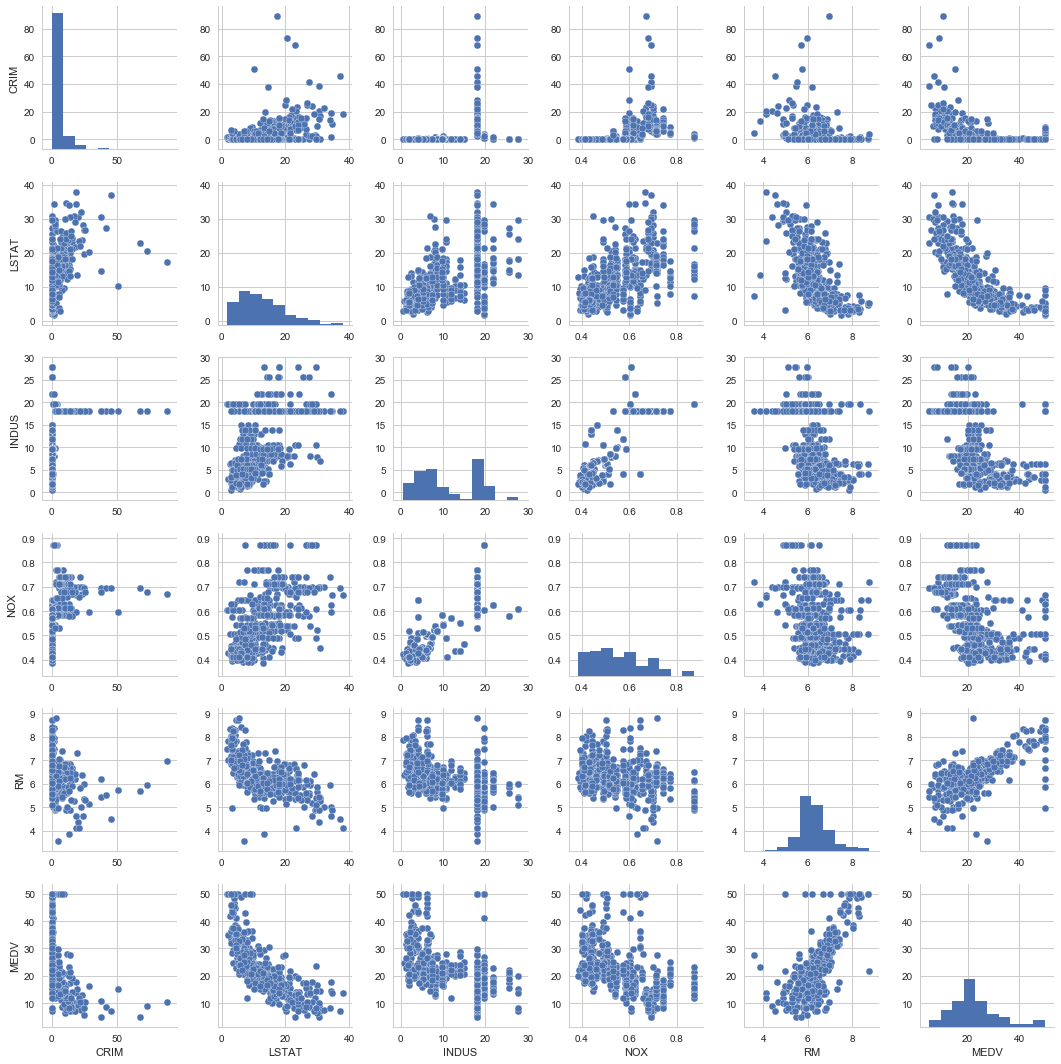

In [4]:
#Creating a scatterplot matrix to visualize the pairwise correlations between the different features in the dataset
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
cols = ['CRIM','LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5);
plt.show()

From the scatterplot, we observe the following:
    
1. There seems to be a positive linear relationship between the average number of rooms per dwelling(RM) 
and the median value of owner occupied homes (MEDV). 

2. There seems to be an almost negative linear relationship between the percentage lower status of the population(LSTAT) 
and the median value of owner occupied homes (MEDV). 

3. The median value of owner occupied homes (MEDV) is normally distributed with several outliers.


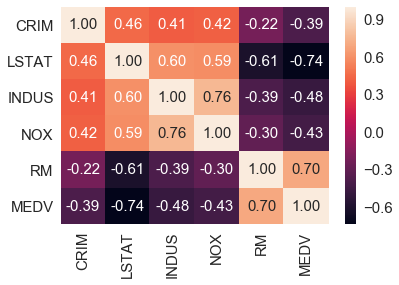

In [12]:
#To quantify the linear realtionship between the features, we create a correlation matrix. 
#First, we use the NumPy's corrcoef function, then the seaborn's heatmap function 
#will be used to plot the correlation matrix array as a heat map:

import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()

In [19]:
#Estimating the coefficient of a regression model via scikitlearn.
# Scikit learn makes use of the LIBLINEAR library and advanced optimization algorithms 
#that work better with unstandardized variables.

from sklearn.linear_model import LinearRegression
X=df[['RM']].values
y=df['MEDV'].values
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0], 'Intercept: %.3f' % slr.intercept_)

Slope: 9.103 Intercept: -34.677


In [32]:
#Fitting robust regression model using RANSAC
#An alternative way to throwing out outliers is using the RANdom SAmple Consensus (RANSAC) algorithm, which
#fits a regression model to a subset of the data, the so-called inliers.

'''
Summary of the iterative RANSAC algorithm as follows:

1. Select a random number of samples to be inliers and fit the model.

2. Test all other data points against the fitted model and add those points
that fall within a user-given tolerance to the inliers.

3. Refit the model using all inliers.

4. Estimate the error of the fitted model versus the inliers.

5. Terminate the algorithm if the performance meets a certain user-defined
threshold or if a fixed number of iterations has been reached; go back to
step 1 otherwise
'''

from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,residual_metric=lambda x: np.sum(np.abs(x), axis=1),
                         residual_threshold=5.0,random_state=0)
ransac.fit(X, y)

'''
NOTE: 
Using the residual_metric parameter, we provided a callable lambda
function that simply calculates the absolute vertical distances between the fitted line
and the sample points. By setting the residual_threshold parameter to 5.0, we
only allowed samples to be included in the inlier set if their vertical distance to the
fitted line is within 5 distance units (this is discretional).

By default, scikit-learn uses the MAD estimate to select the inlier threshold, where MAD
stands for the Median Absolute Deviation of the target values y. However, the choice
of an appropriate value for the inlier threshold is problem-specific, which is one
disadvantage of RANSAC. Many different approaches have been developed over the
recent years to select a good inlier threshold automatically. You can find a detailed
discussion in R. Toldo and A. Fusiello's. Automatic Estimation of the Inlier Threshold in
Robust Multiple Structures Fitting (in Image Analysis and Processing–ICIAP 2009,
pages 123–131. Springer, 2009)
'''


C:\Users\Samuel\Anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\ransac.py:288: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x00000172BAF68620>,
        residual_threshold=5.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

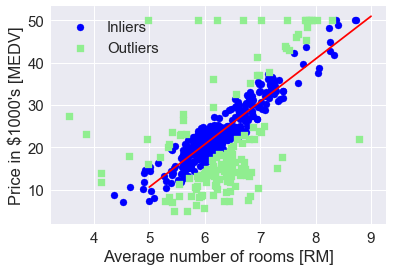

In [36]:

'''
After we have fitted the RANSAC model, let's obtain the inliers and outliers from the
fitted RANSAC linear regression model and plot them together with the linear fit:
'''
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(5, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

We can observe that the regression line is fitted around the inliers.

In [38]:
'''
When we print the slope and intercept of the model executing the following code,
we can see that the linear regression line is slightly different from the fit that we
obtained in the previous section without RANSAC:

This reduces the potential effect of outliers
'''
print('Slope: %.3f' % ransac.estimator_.coef_[0], 'Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.099 Intercept: -39.915


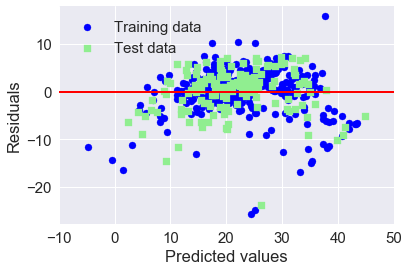

In [43]:
#Evaluating Performance of Linear Regression Model

'''
1.RESIDUAL PLOTS: 
These are a commonly used graphical analysis for diagnosing
regression models to detect nonlinearity and outliers, and to check if the errors
are randomly distributed.

Now we will run a linear regression on all the explanatory variables.
'''

from sklearn.cross_validation import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)


#Using the following code, we will now plot a residual plot where we simply subtract
#the true target variables from our predicted responses:
plt.scatter(y_train_pred, y_train_pred - y_train,c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

In the case of a perfect prediction, the residuals would be exactly zero, which we will probably never encounter in realistic and practical applications. However, for a good regression model, we would expect that the errors are randomly distributed and
the residuals should be randomly scattered around the centerline. If we see patterns in a residual plot, it means that our model is unable to capture some explanatory information, which is leaked into the residuals as we can slightly see in our preceding
residual plot. Furthermore, we can also use residual plots to detect outliers, which are represented by the points with a large deviation from the centerline.

In [46]:
'''
2. MSE and Coefficient of Determination (R^2):
Sometimes it may be more useful to report the coefficient of determination ( R^2 ), which can be understood as a 
standardized version of the mean square error (MSE), for better interpretability of the model performance. 
In other words, R^2 is the fraction of response variance that is captured by the model
'''

from sklearn.metrics import mean_squared_error, r2_score
print('MSE train: %.3f, MSE test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.3f, R^2 test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test, y_test_pred)))                                                                                                    

MSE train: 22.390, MSE test: 21.382
R^2 train: 0.741, R^2 test: 0.728


If the MSE on the training set is smaller than the MSE of the test set, then this is an indicator that the model is overfitting
the training data.

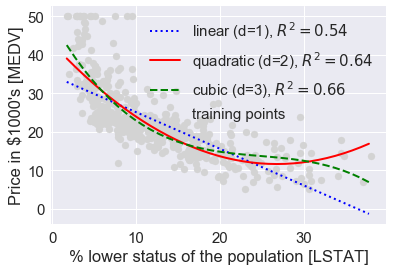

In [66]:
#Quick Example on Polynomial Regression (Modeling non-linear relationships between LSTAT and MEDV)
'''
Although nonlinear relationships between variables can be modeled as multiple linear regression
if they are linear in the parameters, we can also model them using polynomial regression.

By executing the following code, we will model the relationship between house prices (MEDV) 
and LSTAT (percent lower status of the population) using second degree (quadratic) and 
third degree (cubic) polynomials and compare it to a linear fit.
'''
X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()

# create polynomial features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# linear fit
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

# quadratic fit
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

# cubic fit
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


#Plot the results:
plt.scatter(X, y,label='training points',color='lightgray')

plt.plot(X_fit, y_lin_fit,label='linear (d=1), $R^2=%.2f$'% linear_r2,color='blue',lw=2,linestyle=':')

plt.plot(X_fit, y_quad_fit,label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,color='red',lw=2,linestyle='-')

plt.plot(X_fit, y_cubic_fit,label='cubic (d=3), $R^2=%.2f$'% cubic_r2,color='green',lw=2,linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')
plt.show()

We observe that the non linear relationship between LSTAT and MEDV is best captured by the cubic fit; and the coefficient of determination is highest (0.66).

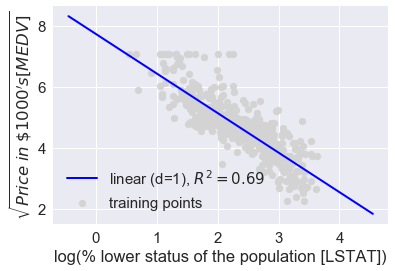

In [67]:
'''
The polynomial regression model may not be a best choice.By observing the scatterplot of MEDV and LSTAT, one can hypothesize 
that a log transformation of the LSTAT feature variable and the square root of the MEDV may 
project the data onto a linear feature space suitable for a linear regression fit.
'''

# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1,X_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt,label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,label='linear (d=1), $R^2=%.2f$' % linear_r2, color='blue',lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')
plt.show()

This current linear model is a better choice than the previous polynomial model, since the coefficient of determination (0.69) is better than that of the polynomial model (0.66).